# **QAI distillation agent concept**
It simulates:

    Quantum fidelity degradation

    Entanglement entropy computation

    Agent decision-making

    Adaptive learning and reward-based evolution

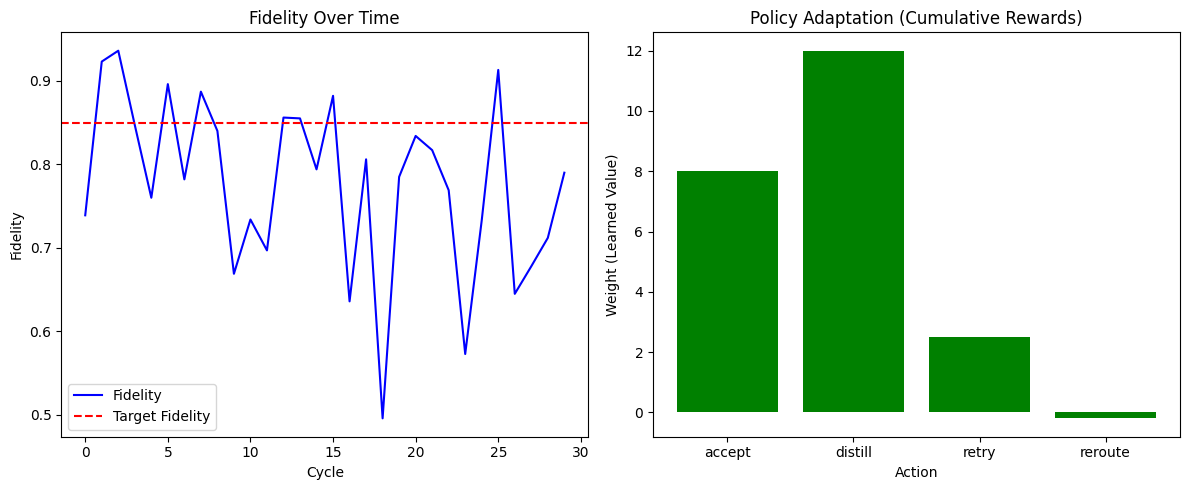

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# --- Dummy Quantum State Simulator (Fidelity & Entropy) ---
def simulate_quantum_channel(noise_level):
    """
    Simulate fidelity and entropy for a noisy quantum entanglement channel.
    Fidelity drops with noise; entropy increases.
    """
    fidelity = max(0.4, 1.0 - noise_level * random.uniform(0.8, 1.3))
    entropy = -fidelity * np.log2(fidelity + 1e-9) - (1 - fidelity) * np.log2(1 - fidelity + 1e-9)
    return round(fidelity, 3), round(entropy, 3)

# --- Autonomous QAI Distillation Agent ---
class QAI_DistillationAgent:
    def __init__(self, fidelity_threshold=0.85):
        self.threshold = fidelity_threshold
        self.policy_weights = {"accept": 0, "distill": 0, "retry": 0, "reroute": 0}
        self.memory = []

    def decide_action(self, fidelity, entropy):
        if fidelity >= self.threshold:
            return "accept"
        elif fidelity >= 0.7:
            return "distill"
        elif fidelity >= 0.6:
            return "retry"
        else:
            return "reroute"

    def update_policy(self, action, reward):
        self.policy_weights[action] += reward
        self.memory.append((action, reward))

# --- Simulation Loop (30 Cycles) ---
agent = QAI_DistillationAgent()
log = []

for cycle in range(30):
    noise = np.clip(np.random.normal(0.2, 0.1), 0.05, 0.5)
    fidelity, entropy = simulate_quantum_channel(noise)
    action = agent.decide_action(fidelity, entropy)

    # Reward logic
    if action == "accept":
        reward = 1.0 if fidelity >= 0.85 else -1.0
    elif action == "distill":
        reward = 0.8 if fidelity >= 0.7 else -0.5
    elif action == "retry":
        reward = 0.5 if fidelity >= 0.6 else -0.2
    else:
        reward = -0.1

    agent.update_policy(action, reward)
    log.append((cycle, fidelity, entropy, action, reward))

# --- Visualization ---
cycles, fids, ents, acts, rews = zip(*[(c, f, e, a, r) for c, f, e, a, r in log])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cycles, fids, label='Fidelity', color='blue')
plt.axhline(agent.threshold, color='red', linestyle='--', label='Target Fidelity')
plt.title("Fidelity Over Time")
plt.xlabel("Cycle")
plt.ylabel("Fidelity")
plt.legend()

plt.subplot(1, 2, 2)
actions = list(agent.policy_weights.keys())
weights = [agent.policy_weights[a] for a in actions]
plt.bar(actions, weights, color='green')
plt.title("Policy Adaptation (Cumulative Rewards)")
plt.xlabel("Action")
plt.ylabel("Weight (Learned Value)")

plt.tight_layout()
plt.show()


**Concept and execution by Bhadale IT, code generated by ChatGPT **